<a target="_blank" href="https://colab.research.google.com/github/aisingapore/learning-buildgpt2/blob/main/Build_GPT_Lecture_NTU.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [22]:
# Requirements
!pip install requests dotenv datasets 2>/dev/null || true
!pip install transformers tensorboard tiktoken 2>/dev/null || true
!pip install matplotlib seaborn 2>/dev/null || true


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached dotenv-0.0.5.tar.gz (2.4 kB)
  Preparing metadata (setup.py) ... error


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 29.1 MB/s eta 0:00:00MB/s eta 0:00:01


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# **Building GPT-2 From Scratch (To Undertand How LLMs Work)**
Updated: 7 February 2025 version 1.0

## **Introduction**
This class walks through the process of building a transfomer-based large language model from scratch (i.e. GPT-2) to give students a feel for what is involved and to be understand some key concepts. We will use a combination of lecture, code, and practice examples in this class.

**Instructors:**
* Dr Leslie Teo, Senior Director, AI Products, AI Singapore
* Dr William Thji, Head, Applied Research in Foundation Models, AI Products, AI Singapore


**Prerequisites:**
* Deep Learning fundamentals
* PyTorch experience
* Basic NLP concepts
* Access to colab

**Duration:**
* 3 hours, with additional project work

### **Figure 0: Overview of Lecture**

![Figure 0.](images/Figure%200.png)

## **Part 1: Introduction to Large Language Models (LLMs)**

**Learning Objectives:**
* Understand what Large Language Models (LLMs) are and their capabilities.
* Explore common use cases and applications of LLMs.
* Learn about the brief history of LLMs.
* Understand why we study GPT-2.

---



### **1.1 What are LLMs?**

**Definition and Capabilities:**

   *   **Large Language Models (LLMs)** are deep learning models trained on massive datasets of text and code. They are designed to **understand and generate human-like text**, **translate languages**, **write different kinds of creative content**, and **answer your questions in an informative way**, even if they are open ended, challenging, or strange. Today LLMs also encompass speech, music (audio), images, and video.
   *   They learn **statistical patterns and relationships** between words, phrases, and sentences, enabling them to perform a wide range of language-based tasks.
   *   **Key characteristics:**
        *   **Large:** These models have billions, even trillions, of parameters (weights and biases).
        *   **Language-focused:** They are specifically trained for understanding and generating natural language.
        *   **Pre-trained:** They are first trained on a vast corpus of general text data and can then be fine-tuned for specific tasks.



### **Figure 1. AI and LLMs**

![Figure 1](images/Figure%201.png)

**Examples:**

   *   GPT-3, GPT-4 (OpenAI) - These are later, more powerful versions.
   *   BERT (Google) -  A different type of Transformer (encoder-only).
   *   LaMDA, PaLM (Google) - Other large-scale models.
   *   BLOOM (BigScience) - An open-source multilingual LLM.
   *   LLaMA (Meta) - Another powerful family of LLMs.
   *   Qwen (Alibaba) - Representing Chinese Big Tech.
   *   Deepseek (Deepseek) - Powerful open weights models.
   *   ChatGPT, Claude, Gemini: Popular applications built on top of LLMs.



**Generative Nature of LLMs**

   *   LLMs are considered "generative" because they **create new text sequences** that are not simply copied from their training data.
   *   They generate text by **sampling from a probability distribution over possible word sequences**. At each step, the model predicts the probability of the next word, given the preceding words, and then a word is selected (sampled) based on these probabilities.
   *   This probabilistic nature allows LLMs to produce diverse and creative outputs.

**Why study GPT-2 if we have newer, bigger models?**

*   **Foundational Understanding:** GPT-2 is a great model for learning the **fundamentals of transformers and LLMs**. Its architecture is simpler than the later models, making it easier to dissect and understand.
*   **Accessibility:** The model and its pre-trained weights are readily available through libraries like Hugging Face Transformers.
*   **Resource-Friendly:** You can experiment with and even fine-tune GPT-2 on less powerful hardware compared to the behemoths like GPT-3 or GPT-4.



**Key Concept:** LLMs are powerful deep learning models that can understand and generate human-like text by learning statistical patterns from vast amounts of data. They are **generative** because they create new text sequences by sampling from learned probability distributions.



In [ ]:
# Example: Using SEA-LION
import requests
import json
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access your variables
API_KEY = os.getenv('API_KEY')

url = "https://api.sea-lion.ai/v1/chat/completions"

headers = {
    "accept": "application/json",
    "Content-Type": "application/json",
    "Authorization": "Bearer " + API_KEY,
}

payload = {
    "messages": [{"role": "user", "content": "Hi SEA-LION"}],
    "model": "aisingapore/llama3.1-8b-cpt-sea-lionv3-instruct",
    "stream": False,
}

response = requests.post(url, headers=headers, json=payload)
print(json.dumps(response.json(), indent=2))


### **1.2 Use Cases and Applications of LLMs**

**Common Applications:**
   *   **Proprietary Services:** Using pre-built and hosted LLM services like **ChatGPT** for various tasks (e.g., writing assistance, question answering, code generation).
   *   **Custom Deployments:** Running your own instance of an LLM (like Llama) locally on your own hardware. This gives you more control over the model, data privacy, and customization.
   *   **API Integration:** Deploying LLMs as API endpoints that other applications can interact with. This allows you to integrate LLM capabilities into your own software systems.



**Examples**

*   **Chatbots and Conversational AI:** Creating intelligent agents that can engage in natural language conversations.
*   **Text Generation:** Writing stories, articles, scripts, poems, code, and other forms of creative content.
*   **Machine Translation:** Translating text from one language to another.
*   **Question Answering:** Providing answers to questions based on a given context or general knowledge.
*   **Text Summarization:** Condensing large amounts of text into shorter, concise summaries.
*   **Code Completion and Generation:** Assisting developers by suggesting code completions and even generating entire code blocks.
*   **Sentiment Analysis:** Determining the emotional tone or sentiment expressed in a piece of text.
*   **And many more emerging applications...**




**Key Concept:** LLMs have a wide range of applications, from using readily available services like ChatGPT to building custom solutions and integrating LLMs into various software systems.




### **1.3 A Brief History of LLMs**

*   **Early Days (Pre-2017):**
    *   **Statistical Language Models (n-gram models):** These models used statistical methods to predict the probability of a sequence of words. Limited by their inability to capture long-range dependencies.
    *   **Recurrent Neural Networks (RNNs), specifically LSTMs:** RNNs, and especially LSTMs, became popular for language modeling because they could process sequential data and theoretically capture longer dependencies. However, they suffered from issues like vanishing gradients and difficulty in parallelization. Andrej Karpathy's blog post "The Unreasonable Effectiveness of Recurrent Neural Networks" demonstrated the power of character-level RNNs.
*   **The Transformer Revolution (2017):**
    *   The "Attention is All You Need" paper introduced the **Transformer** architecture. This was a paradigm shift. Transformers use a mechanism called "attention" that allows them to weigh the importance of different words in a sequence when making predictions, overcoming limitations of the RNN.
    *   **Key Advantages of Transformers:**
        *   **Parallelization:** Transformers can process the entire input sequence in parallel, significantly speeding up training.
        *   **Long-Range Dependencies:** Attention allows them to effectively capture relationships between words that are far apart in a sequence.
*   **The Rise of LLMs (2018 - Present):**
    *   **BERT (2018):** Bidirectional Encoder Representations from Transformers. Introduced masked language modeling (MLM) during pre-training.
    *   **GPT (2018), GPT-2 (2019), GPT-3 (2020), GPT-4 (2023):** OpenAI's Generative Pre-trained Transformer series. These models demonstrated the power of scaling up model size and training data.
    *   **Other Notable LLMs:** Many other organizations followed suit, developing their own large models (e.g., LaMDA, PaLM, BLOOM, LLaMA).
*   **The Current Landscape:**
    *   Rapid progress and research continue, pushing the boundaries of model size, capabilities, and efficiency.
    *   Ethical considerations, bias, and safety are increasingly important topics in the field.


### **1.4 Training an LLM - Let's Use GPT-2**

*   **Overview of GPT-2**
    *   GPT-2 is a **decoder-only Transformer model**. This means it's designed for text generation, predicting the next word in a sequence given the preceding words. In contrast, an encoder-decoder architecture, such as the one originally described in [Attention is All You Need](https://arxiv.org/abs/1706.03762), is more common in tasks like machine translation where the input and output can have different lengths.
    *   It was developed by OpenAI and released in stages due to concerns about potential misuse.
    *   It was a significant advancement in the field of NLP, demonstrating the power of scaling up model size and training data.
*   **GPT-2 Miniseries and Scaling Laws**
    *   OpenAI released different sizes of GPT-2 models (small, medium, large, XL), each with an increasing number of parameters.
    *   **Scaling Laws:** Research on GPT-2 and other LLMs has shown that there are **predictable relationships** between model size, dataset size, compute used for training, and the resulting model performance. Generally, **larger models trained on more data with more compute tend to perform better**. This also informs why we are focusing on GPT-2 now, which can help us to learn some of the fundamental concepts.

*   **Availability**
    *   Pre-trained weights and code for GPT-2 are publicly available, primarily through libraries like **Hugging Face Transformers**. This makes it relatively easy to get started with using and experimenting with GPT-2.
*   **Demonstration**
    *   We will (later in the course) run a simplified GPT-2 training example and show the **objective (predicting the next word)** and how the **loss function decreases over time** as the model learns.


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained("gpt2")
tokenizer = AutoTokenizer.from_pretrained("gpt2")

# Set padding token
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

# Prepare input with prompt
prompt = "GPT2 is a model developed by OpenAI. Tomorrow is Chinese New Year"
inputs = tokenizer(
    prompt,
    return_tensors="pt",
    padding=True,
    truncation=True,
    max_length=100,
    add_special_tokens=True
)

# Generate text
gen_tokens = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    do_sample=True,
    temperature=0.9,
    max_length=100,
    pad_token_id=tokenizer.pad_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

# Decode and print the generated text
gen_text = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)[0]
print(gen_text)

### **1.5 Core Concepts: Transformers and Attention**

*   **1.5.1 The Transformer Architecture:**
    *   **Encoder-Decoder Structure (Original Transformer):**
        *   The original Transformer had an **encoder** and a **decoder**.
        *   **Encoder:** Processes the input sequence and creates a contextualized representation.
        *   **Decoder:** Generates the output sequence based on the encoder's representation and its own previous outputs.
        *   **Example:** Machine translation - the encoder processes the source language sentence, and the decoder generates the target language translation.
    *   **GPT-2: Decoder-Only Model:**
        *   GPT-2 uses **only the decoder** part of the Transformer. It's designed for text generation.
        *   It predicts the next word in a sequence given the preceding words.


**Reference:** [The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/) by Jay Alammar


### **Figure 2: Transformer Architecture (Encoder-Decoder)**

![Figure 2a: Transformer](images/Figure%202a.png)


![Figure 2b: Transformer](images/Figure%202b.png)

**Figure 3: GPT-2 Architecture (Decoder-Only)**


![Figure 3: GPT-2](images/Figure%203.png)
  

**Key Components:**
*   **Embedding Layer:** Converts words into numerical vectors (**embeddings**). These vectors capture the semantic meaning of words.
*   **Positional Encoding:** Adds information about the **position** of words in the sequence to the embeddings. This is crucial because, unlike RNNs, Transformers don't inherently process data sequentially.
*   **Decoder Layers (GPT-2 has multiple):** Each layer consists of:
*   **Masked Self-Attention:** Allows the model to attend to **preceding** words in the sequence when predicting the next word (more on this below). The "masked" part ensures that the model doesn't "cheat" by looking at future words during training.
*   **Feed-Forward Neural Network:** A simple fully connected network that further processes the output of the attention layer.
*  **Output Layer:** A linear layer followed by a softmax function that produces a **probability distribution over the vocabulary**, indicating the likelihood of each word being the next word. The model assigns a probability to every possible word in its vocabulary, indicating how likely it is to be the next word.

*   **1.5.2 Attention Mechanism:**
    *   **Intuition:** **Attention** allows the model to **focus on the most relevant parts of the input sequence** when making a prediction. Think of it like highlighting the important words in a sentence when you're trying to understand its meaning.
    *   **Analogy:** Imagine you're translating a sentence. You don't just translate each word in isolation. You consider the entire sentence, paying more attention to certain words that are crucial for understanding the meaning of the word you're currently translating. This is how attention allows the model to "weigh" the importance of other words.
    *   **Self-Attention:** In **self-attention**, the input sequence attends to **itself**. Each word in the sequence attends to every other word in the same sequence.
    *   **Masked Self-Attention (in GPT-2):** In GPT-2, the self-attention is "**masked**" during training. This means that when a word is attending to other words, it can **only attend to the words that came before it** in the sequence. This is because GPT-2 is trained to predict the next word, and allowing it to see future words would be like giving it the answers during a test.



**How it Works (Simplified):**
  
   * Scenario: We have the input sentence "The cat sat on the mat".  We want to understand how the attention mechanism works when focusing on the word "sat".
   * Simplified Analogy: Imagine you're reading this sentence. When you get to "sat", you instinctively pay more attention to "cat" and "mat" because they tell you who is sitting and where.  Attention in Transformers works similarly.

**Key Concepts:**

   * Queries, Keys, and Values: These are vector representations of the words.  Think of them as different facets of the word.  For our example, let's simplify and say each word has a "meaning" vector.
        * Query: The word we're currently focusing on ("sat" in this case). It's asking "What am I related to?"
        * Keys: The other words in the sentence ("the", "cat", "on", "the", "mat"). They represent "What information do I offer?"
        * Values: Also the other words. They represent the actual information the word carries. (In reality, Keys and Values are often the same).
    * Scoring: We calculate a "score" between the Query ("sat") and each Key (every word).  This score represents how much the other word relates to the current word. A higher score means more attention.  We can use a simple dot product for this example.
    * Softmax: We apply a softmax function to the scores. This converts the scores into probabilities that sum up to 1. These probabilities represent the attention weights.
    * Weighted Sum: We multiply each Value (the actual word representation) by its corresponding attention weight and sum them up.  This weighted sum is the output of the attention mechanism for the word "sat".



**Example:**

Let's pretend our word vectors are just single numbers (for simplicity).  In reality, they'd be much larger vectors.

Word	Meaning (Query/Key/Value)
The	1
cat	5
sat	3
on	2
the	1
mat	4

Export to Sheets
Query (sat): 3

Keys (all words): 1, 5, 3, 2, 1, 4

Scoring (Dot Product):

"sat" x "the" = 3 * 1 = 3
"sat" x "cat" = 3 * 5 = 15
"sat" x "sat" = 3 * 3 = 9
"sat" x "on" = 3 * 2 = 6
"sat" x "the" = 3 * 1 = 3
"sat" x "mat" = 3 * 4 = 12
Softmax (Simplified): Let's just normalize these scores so they sum to 1 (a true softmax is a bit more complex).  The exact values aren't crucial for the illustration:

"the": 3 / (3+15+9+6+3+12) ≈ 0.04
"cat": 15 / (3+15+9+6+3+12) ≈ 0.24
"sat": 9 / (3+15+9+6+3+12) ≈ 0.14
"on": 6 / (3+15+9+6+3+12) ≈ 0.10
"the": 3 / (3+15+9+6+3+12) ≈ 0.04
"mat": 12 / (3+15+9+6+3+12) ≈ 0.19
Weighted Sum:

(0.04 * 1) + (0.24 * 5) + (0.14 * 3) + (0.10 * 2) + (0.04 * 1) + (0.19 * 4) ≈ 1.87
Interpretation:

The output for "sat" is approximately 1.87. Notice how "cat" and "mat" have the highest attention weights (0.24 and 0.19 respectively). This means the model paid more attention to "cat" and "mat" when processing "sat", which makes intuitive sense. The number 1.87 is a weighted representation that encodes the context around "sat".
        

**Scaled Dot-Product Attention:** This is the most common type of attention used in Transformers, including GPT-2. The attention scores are scaled down by the square root of the dimension of the key vectors. This helps to prevent the gradients from becoming too small during training.

**Formula for Scaled Dot-Product Attention:**

$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V$
            
where:
*   $Q$ is the matrix of queries
*   $K$ is the matrix of keys
*   $V$ is the matrix of values
*   $d_k$ is the dimension of the keys



**Figure 4: Self-Attention Mechanism**

![Figure 4: High-level Attention](images/Figure%204.png)




**Figure 5: Self-Attention Mechanism (Detailed)**


![Figure 5: High-level Attention](images/Figure%205.png)


**Multi-Head Attention:**

   *   Instead of having just one set of Q, K, and V vectors per word, **multi-head attention** uses multiple sets (multiple "**heads**").
   *   Each head learns to attend to **different aspects** of the input sequence.
   *   **Analogy:** Think of it like having multiple experts examining the same sentence, each focusing on a different aspect (e.g., syntax, semantics, coreference).
   *   The outputs of the multiple heads are concatenated and then passed through a linear layer to produce the final output.




**Figure 6: Multi-Head Attention**

![Figure 6: Multi-Head Attention](images/Figure%206.png)



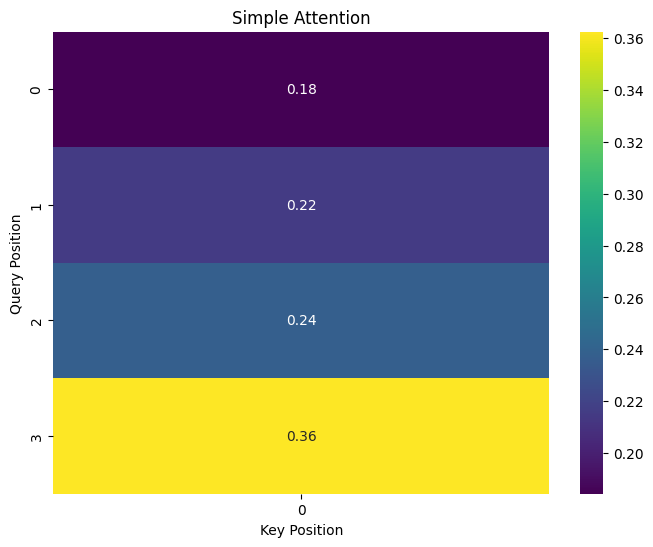


Simple Attention Shape: torch.Size([2, 4, 1])


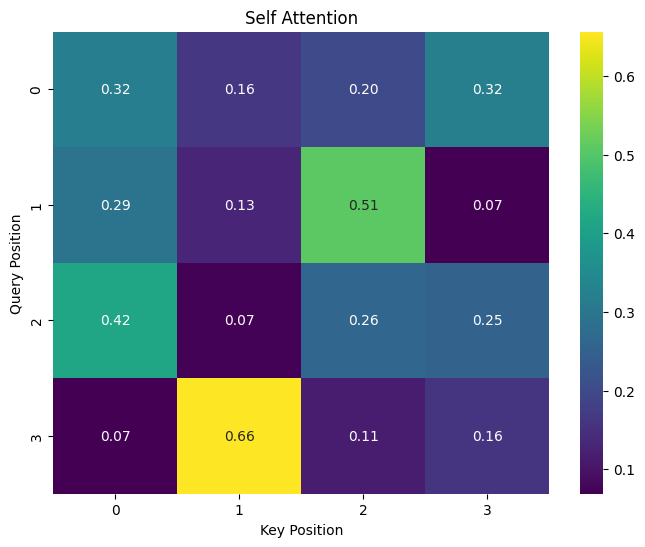


Self Attention Shape: torch.Size([2, 4, 4])


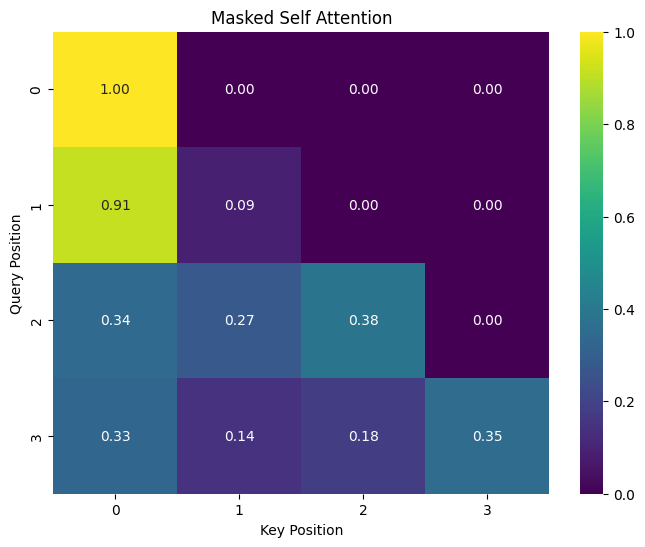


Masked Self Attention Shape: torch.Size([2, 4, 4])


In [8]:
#Attention examples

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
import seaborn as sns

class SimpleAttention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.attention = nn.Linear(hidden_size * 2, 1)

    def forward(self, query, keys):
        batch_size, seq_len, _ = keys.shape
        query = query.unsqueeze(1).repeat(1, seq_len, 1)
        combined = torch.cat([query, keys], dim=2)
        scores = self.attention(combined).squeeze(2)
        attention_weights = F.softmax(scores, dim=1)
        output = torch.bmm(attention_weights.unsqueeze(1), keys).squeeze(1)
        return output, attention_weights.unsqueeze(-1)  # Add dimension for visualization

class SelfAttention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)
        self.scale = math.sqrt(hidden_size)

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        scores = torch.bmm(q, k.transpose(1, 2)) / self.scale
        attention_weights = F.softmax(scores, dim=2)
        output = torch.bmm(attention_weights, v)
        return output, attention_weights

class MaskedSelfAttention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)
        self.scale = math.sqrt(hidden_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        scores = torch.bmm(q, k.transpose(1, 2)) / self.scale
        mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
        mask = mask.unsqueeze(0).expand(batch_size, -1, -1).to(x.device)
        scores = scores.masked_fill(mask, float('-inf'))
        attention_weights = F.softmax(scores, dim=2)
        output = torch.bmm(attention_weights, v)
        return output, attention_weights

def plot_attention_matrix(weights, title):
    plt.figure(figsize=(8, 6))
    weights_np = weights[0].detach().numpy()
    if len(weights_np.shape) == 3:
        weights_np = weights_np.squeeze()
    sns.heatmap(weights_np, annot=True, fmt='.2f', cmap='viridis')
    plt.title(title)
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

def run_demonstration():
    batch_size = 2
    seq_len = 4
    hidden_size = 8

    x = torch.randn(batch_size, seq_len, hidden_size)
    query = torch.randn(batch_size, hidden_size)

    models = {
        'Simple Attention': SimpleAttention(hidden_size),
        'Self Attention': SelfAttention(hidden_size),
        'Masked Self Attention': MaskedSelfAttention(hidden_size)
    }

    with torch.no_grad():
        for name, model in models.items():
            if name == 'Simple Attention':
                output, weights = model(query, x)
            else:
                output, weights = model(x)
            plot_attention_matrix(weights, name)
            print(f"\n{name} Shape:", weights.shape)

run_demonstration()

## **Part 2: Data Preparation and Tokenization**

**Learning Objectives:**
* Understand the importance of data preparation for LLMs.
* Learn what tokenization is and why it's necessary.
* Understand the different steps in the tokenization process.
* Learn what Byte Pair Encoding is and how it works.
* Be able to use tiktoken to encode and decode text.


### **2.1 Importance of Data Preparation**

*   **Data is the Foundation:** The performance and capabilities of an LLM are heavily dependent on the quality and nature of the data it's trained on.
*   **Garbage In, Garbage Out:** If you train a model on poorly formatted, biased, or irrelevant data, you'll get a poorly performing, biased, or irrelevant model.
*  **LLM Comprehension:** Data preparation, particularly **tokenization**, is crucial for how the LLM "understands" the input text. Tokenization allows the model to map words to numerical vectors, and the way you break down text into tokens directly affects what the model learns.
*   **Key Considerations:**
    *   **Data Source:** Where does the data come from? Is it representative of the kind of text you want the model to generate? (e.g. WebText for GPT-2, a collection of diverse web pages)
    *   **Data Cleaning:** Removing noise, errors, inconsistencies, and irrelevant parts (e.g., HTML tags, special characters).
    *   **Data Formatting:** Structuring the data in a way that the model can process (e.g., each training example might be a sequence of text of a certain length).
    *   **Dataset Size:** Larger datasets generally lead to better performance, but there are diminishing returns.
    *   **Data Bias:** Is the data biased in any way (e.g., gender, race, ideology)? This can lead to a biased model.



**Key Concept:** Data preparation is a critical step in building LLMs. The quality, format, and content of the training data directly impact the model's performance, capabilities, and potential biases.



### **2.2 Tokenization and Its Role**

*   **What is Tokenization?**
    *   Tokenization is the process of **splitting text into individual units called tokens**.
    *   Tokens can be words, subwords, characters, or even punctuation marks, depending on the tokenization method.
    *   Think of it like breaking down a sentence into its building blocks.

*   **Why is it Necessary?**
    *   **Numerical Representation:**  Neural networks work with numbers, not raw text. Tokenization is the first step in converting text into a numerical representation that the model can process.
    *   **Vocabulary:** Tokenization defines the **vocabulary** of the model – the set of all unique tokens that the model recognizes.
    *   **Input to the Model:** The sequence of tokens (represented as numerical IDs) becomes the input to the LLM.

*   **Example:**

    *   Sentence: "The quick brown fox jumps over the lazy dog."
    *   Tokenization (word-level): ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog", "."]



**Key Concept:** Tokenization is the process of breaking down text into smaller units (tokens) that can be represented numerically, forming the model's vocabulary and providing the input for training.

### **2.3 Tokenization Process Detailed**

*   **Steps Involved:**

    1.  **Text Cleaning (Preprocessing):**
        *   This step is often done *before* the core tokenization process.
        *   It can involve:
            *   Removing HTML tags or other markup.
            *   Handling special characters or encoding issues.
            *   Lowercasing text (optional, depends on the model and task).
            *   Removing irrelevant sections (e.g., headers, footers).

   2.  **Text Splitting:**
        *   The core of tokenization.
        *   Text is split into tokens based on a set of rules or an algorithm.
        *   Common approaches:
            *   **Whitespace Splitting:** The simplest method, splitting on spaces and punctuation.
                    *   **Rule-based Splitting:** Using predefined rules to handle special cases (e.g., contractions like "don't").
            *   **Subword Tokenization (e.g., Byte Pair Encoding, WordPiece):** More advanced algorithms that split words into smaller units (subwords). We'll focus on Byte Pair Encoding (BPE) later.


   3.  **Token ID Conversion:**
        *   Each unique token in the vocabulary is assigned a unique numerical ID.
        *   A **vocabulary file** (or a mapping) stores the correspondence between tokens and their IDs.
        *   Example:
            *   "The": 0
            *   "quick": 1
            *   "brown": 2
            *   ...and so on...

   4.  **Embeddings Conversion (Conceptual Overview):**
        *   This step happens *inside* the model, but it's important to understand the connection.
        *   Token IDs are used to look up corresponding **word embeddings** in an embedding layer.
        *   Embeddings are dense vector representations of words that capture semantic meaning.


*   **Example (Illustrative):**

    ```
    Text: "Hello, world! This is a sentence."

    1. Text Cleaning (e.g., lowercase, remove punctuation):
       "hello world this is a sentence"

    2. Text Splitting (e.g., whitespace splitting):
       ["hello", "world", "this", "is", "a", "sentence"]

    3. Token ID Conversion (using a hypothetical vocabulary):
       [10, 25, 42, 18, 5, 67]

    4. Embeddings Conversion (inside the model):
       The model looks up the embedding vectors for each of these IDs in its embedding layer.
    ```

**Key Concept:** Tokenization involves cleaning the text, splitting it into tokens, converting those tokens into numerical IDs based on a vocabulary, and then using these IDs to look up word embeddings inside the model.



### **2.4 Byte Pair Encoding (BPE)**

*   **Introduction to BPE:**

    *   BPE is a **subword tokenization algorithm** that is widely used in modern LLMs, including GPT-2.
    *   It's a good balance between the granularity of character-level tokenization (which can result in very long sequences) and the limitations of word-level tokenization (which struggles with out-of-vocabulary words).
    *   **Key Idea:** BPE iteratively merges the most frequent pair of consecutive tokens into a new, single token.

*   **Handling Unknown Words:**

    *   BPE can handle words that were not seen during training (out-of-vocabulary or OOV words) by breaking them down into subword units that are present in the vocabulary.
    *   For example, if the word "aaabdabc" was not seen during training, but we have "aaab" and "dabc" in the vocabulary from above steps, we can tokenize it as two tokens.



*   **How BPE Works:**

    1.  **Start with a vocabulary of individual characters.**
    2.  **Iteratively merge the most frequent pair of consecutive tokens** in the training data into a new token.
    3.  **Add the new token to the vocabulary.**
    4.  **Repeat step 2 and 3** until a desired vocabulary size is reached or a certain number of merges have been performed.


*   **Example (Illustrative):**

    Let's say we have the following training data (simplified):

    ```
    "aaabdaaabac"
    ```

    1.  **Initial Vocabulary:** `["a", "b", "c", "d"]`

    2.  **Iteration 1:**
        *   Most frequent pair: "aa" (occurs twice)
        *   New token: "aa"
        *   Updated vocabulary: `["a", "b", "c", "d", "aa"]`
        *   Data: `["aa", "ab", "d", "aa", "ab", "a", "c"]`

    3.  **Iteration 2:**
        *   Most frequent pair: "ab" (occurs twice)
        *   New token: "ab"
        *   Updated vocabulary: `["a", "b", "c", "d", "aa", "ab"]`
        *   Data: `["aa", "ab", "d", "aa", "ab", "a", "c"]`

    4.  **Iteration 3:**
        *   Most frequent pair: "aaab" (occurs twice)
        *   New token: "aaab"
        *   Updated vocabulary: `["a", "b", "c", "d", "aa", "ab", "aaab"]`
        *   Data: `["aaab", "d", "aaab", "a", "c"]`

        ...and so on...


**Key Concepts:**

*   **BPE is a subword tokenization algorithm** that iteratively merges frequent token pairs.
*   It helps to **balance vocabulary size and the ability to handle unknown words**.
*   It's commonly used in modern LLMs like GPT-2.
---


### **2.5 Hands-on Exercise 1: Data Preparation and Tokenization**

*   **Activity:** We'll use the `tiktoken` library, which provides a fast implementation of the BPE tokenizer used by GPT-2.

*   **Task:**
    1.  Take a sample text.
    2.  Tokenize the text using the GPT-2 tokenizer from `tiktoken`.
    3.  Inspect the generated tokens and their corresponding IDs.

*   **Guidance:**

    *   Observe how the text is split into tokens.
    *   Notice how punctuation is handled.
    *   See how subwords are used for words that might not be in the vocabulary (like "blargh" or "pলাপ").
    *   Understand the relationship between tokens and their IDs.

**Key Takeaways:**

*   Students should be able to use the `tiktoken` library to tokenize text using the GPT-2 tokenizer.
*   They should understand how text is converted into a sequence of token IDs.
*   They should observe how BPE handles subwords and potentially unknown words.


In [9]:
## BPE example

import tiktoken

# Get the GPT-2 tokenizer
tokenizer = tiktoken.get_encoding("gpt2")

# Sample text
text = "This is a sample text for demonstrating GPT-2 tokenization. This includes some উদ্ভট words like pলাপ, and some made up ones like blargh, which should still tokenize properly."

# Encode (tokenize) the text
encoded_text = tokenizer.encode(text)

# Decode (detokenize) the tokens back into text
decoded_text = tokenizer.decode(encoded_text)

# Print the encoded text (token IDs)
print("Encoded text (token IDs):", encoded_text)

# Print the decoded text
print("Decoded text:", decoded_text)

# Print each token and its ID
print("Tokens and their IDs:")
for token_id in encoded_text:
    print(f"Token: '{tokenizer.decode([token_id])}', ID: {token_id}")

# Test with an out of vocabulary word
oov_text = "This is a text with an out of vocabulary word: blarghxyz"
encoded_oov_text = tokenizer.encode(oov_text)
print(f"Encoded OOV text: {encoded_oov_text}")
print(f"Decoded OOV text: {tokenizer.decode(encoded_oov_text)}")
for token_id in encoded_oov_text:
    print(f"Token: '{tokenizer.decode([token_id])}', ID: {token_id}")

Encoded text (token IDs): [1212, 318, 257, 6291, 2420, 329, 21135, 402, 11571, 12, 17, 11241, 1634, 13, 770, 3407, 617, 220, 48071, 231, 48071, 99, 156, 100, 235, 48071, 255, 48071, 253, 2456, 588, 279, 48071, 110, 48071, 122, 48071, 103, 11, 290, 617, 925, 510, 3392, 588, 698, 283, 456, 11, 543, 815, 991, 11241, 1096, 6105, 13]
Decoded text: This is a sample text for demonstrating GPT-2 tokenization. This includes some উদ্ভট words like pলাপ, and some made up ones like blargh, which should still tokenize properly.
Tokens and their IDs:
Token: 'This', ID: 1212
Token: ' is', ID: 318
Token: ' a', ID: 257
Token: ' sample', ID: 6291
Token: ' text', ID: 2420
Token: ' for', ID: 329
Token: ' demonstrating', ID: 21135
Token: ' G', ID: 402
Token: 'PT', ID: 11571
Token: '-', ID: 12
Token: '2', ID: 17
Token: ' token', ID: 11241
Token: 'ization', ID: 1634
Token: '.', ID: 13
Token: ' This', ID: 770
Token: ' includes', ID: 3407
Token: ' some', ID: 617
Token: ' ', ID: 220
Token: '�', ID: 48071
Token: 

## **Part 3: Training GPT-2**

**Learning Objectives:**
* Understand the architecture of GPT-2
* Learn how to implement a GPT-2 model from scratch
* Understand what pre-training is and why it's important
* Learn the core concepts of training
* Run a simplified GPT-2 training example


### **3.1 GPT-2 Architecture Overview**

*   **Recap:** GPT-2 is a **decoder-only Transformer model**. It uses the decoder part of the original Transformer architecture (from "Attention is All You Need") for text generation.
*   **Components:**
    *   **Token Embeddings:**
        *   Converts input tokens (represented as numerical IDs) into **dense vector representations** called embeddings.
        *   These embeddings capture semantic meaning and relationships between words.
        *   The embedding layer is essentially a large lookup table where each row corresponds to the embedding vector for a specific token ID in the vocabulary.
    *   **Positional Encodings:**
        *   Since Transformers don't inherently process sequential information, positional encodings are added to the token embeddings to provide information about the **position of each token in the sequence**.
        *   These encodings can be learned or fixed (e.g., using sine and cosine functions, as in the original Transformer paper).
   


 *   **Transformer Blocks (Decoder Layers):**
        *   GPT-2 has multiple stacked Transformer blocks (or decoder layers). The number of blocks varies depending on the model size (e.g., 12 blocks in GPT-2 small, 48 in GPT-2 XL).
        *   Each block consists of:
            *   **Masked Self-Attention:**  Allows the model to attend to the **preceding tokens** in the sequence when predicting the next token. The "masking" prevents the model from "seeing" future tokens during training.
            *   **Feed-Forward Network:** A two-layer fully connected network that applies a non-linear transformation to the output of the attention layer.
    *   **Output Layer:**
        *   A linear layer that projects the output of the final Transformer block to the size of the vocabulary.
        *   A **softmax function** is applied to produce a probability distribution over the vocabulary, where each element represents the probability of the corresponding token being the next word in the sequence.


**Figure 7. GPT-2 Architecture**

![Figure 7](images/Figure%207.png)

**Figure 8. Overview of GPT-2 Model Code**

![Figure 7-1](images/Figure%207-1.png)

**Key Concepts:**

*   GPT-2 is a **decoder-only Transformer** with multiple stacked layers.
*   **Token embeddings** represent words as vectors.
*   **Positional encodings** provide information about token order.
*   **Transformer blocks** use **masked self-attention** and **feed-forward networks** to process the sequence.
*   The **output layer** produces a probability distribution over the vocabulary.

---


### **3.2 Implementing the GPT-2 Model from Scratch**

*   **Skeleton Code:**

 We'll start with a basic framework for the GPT-2 class in PyTorch. The goal of this code is to show you how the different parts of a Transformer model work by implementing them from scratch. Don't worry if you don't understand all of it right away! We will go through it step by step.

```
import torch
import torch.nn as nn
import math

class GPT2(nn.Module):
    def __init__(self, vocab_size, d_model, nhead, num_layers, dim_feedforward, dropout=0.1, layer_norm_epsilon=1e-5):
        super().__init__()

        # 1. Token Embedding Layer
        self.token_embedding = nn.Embedding(vocab_size, d_model)

        # 2. Positional Encoding Layer (using fixed sinusoidal encodings)
        self.positional_encoding = PositionalEncoding(d_model, dropout)

        # 3. Transformer Blocks (Decoder Layers)
        self.transformer_blocks = nn.ModuleList([
            TransformerBlock(d_model, nhead, dim_feedforward, dropout, layer_norm_epsilon) for _ in range(num_layers)
        ])

        # 4. Output Layer
        self.output_layer = nn.Linear(d_model, vocab_size)

        # Weight tying (optional but often beneficial)
        self.output_layer.weight = self.token_embedding.weight

        self.d_model = d_model

    def forward(self, input_ids, attention_mask=None):
        # 1. Get token embeddings
        x = self.token_embedding(input_ids) * math.sqrt(self.d_model) # Scale embeddings

        # 2. Add positional encodings
        x = self.positional_encoding(x)

        # 3. Create causal attention mask (to prevent attending to future tokens)
        if attention_mask is None:
            seq_len = input_ids.size(1)
            attention_mask = torch.triu(torch.ones(seq_len, seq_len, device=x.device, dtype=torch.bool), diagonal=1)

        # Invert the mask for compatibility with PyTorch's masking convention
        attention_mask = attention_mask.logical_not()

        # 4. Pass through Transformer blocks
        for block in self.transformer_blocks:
          x = block(x, attention_mask)

        # 5. Calculate output logits
        logits = self.output_layer(x)

        return logits
```





```
    class TransformerBlock(nn.Module):
        def __init__(self, d_model, nhead, dim_feedforward, dropout, layer_norm_epsilon):
            super().__init__()

            # Multi-head attention with efficient implementations
            self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True)

            # Feed-forward network
            self.ffn = nn.Sequential(
                nn.Linear(d_model, dim_feedforward),
                nn.GELU(),
                nn.Linear(dim_feedforward, d_model),
                nn.Dropout(dropout)
            )

            # Layer normalization
            self.norm1 = nn.LayerNorm(d_model, eps=layer_norm_epsilon)
            self.norm2 = nn.LayerNorm(d_model, eps=layer_norm_epsilon)
            self.dropout = nn.Dropout(dropout)

        def forward(self, x, attention_mask):
            # Multi-head attention + residual connection
            attn_output, _ = self.self_attn(x, x, x, attn_mask=attention_mask, need_weights=False)
            x = self.norm1(x + self.dropout(attn_output))

            # Feed-forward network + residual connection
            ffn_output = self.ffn(x)
            x = self.norm2(x + self.dropout(ffn_output))

            return x
 ```

```
    class PositionalEncoding(nn.Module):
        def __init__(self, d_model, dropout=0.1, max_len=5000):
            super().__init__()
            self.dropout = nn.Dropout(p=dropout)

            position = torch.arange(max_len).unsqueeze(1)
            div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
            pe = torch.zeros(max_len, 1, d_model)
            pe[:, 0, 0::2] = torch.sin(position * div_term)
            pe[:, 0, 1::2] = torch.cos(position * div_term)
            self.register_buffer('pe', pe)

        def forward(self, x):
            x = x + self.pe[:x.size(1)].transpose(0, 1)
            return self.dropout(x)
```


*   **Step-by-Step Explanation:**

    *   **Token Embeddings:**
         *   The `nn.Embedding(vocab_size, d_model)` creates the embedding layer, a lookup table where each row is a vector that represents a token.
         *   `vocab_size` is the number of unique tokens in your vocabulary.
         *   `d_model` is the dimensionality of the embedding vectors (e.g., 768 in GPT-2 small), this determines how detailed the information the vector can store about the token.
         *  In the `forward` method, `input_ids` (a tensor of token IDs) is passed to `self.token_embedding` to get the corresponding embeddings. This means we are looking up the vector associated with each token id.

     *   **Positional Encodings (Fixed Sinusoidal):**
        *   Unlike Recurrent Neural Networks which processes the input sequentially, the Transformer treats all words as being equally far away from each other. The `PositionalEncoding` class adds information about the **position** of words in the sequence to the embeddings using sin and cos functions. This allows the Transformer to understand the order of words in the sequence.
        *   It is added to the token embeddings in the `forward` method.

    *   **Transformer Block:**
         *   **Multi-Head Attention:**
            *   `nn.MultiheadAttention(d_model, nhead, dropout=dropout)` creates the multi-head self-attention layer.
            *   `d_model` is the dimensionality of the input and output (same as the embedding dimension).
            *   `nhead` is the number of attention heads (e.g., 12 in GPT-2 small). Having multiple heads allows the model to attend to different types of relations between the words.
            *   `dropout` is the dropout rate, a technique to prevent overfitting.
            *   In the `forward` method:
                *   `x` is passed as the query, key, and value to `self.self_attn`.
                *   `attention_mask` is used for masking (we prevent the model from attending to future tokens during training).
                *   The output of the attention layer is added to the original input (`x`) - this is called a **residual connection** which makes training deeper networks possible.
                *   Layer normalization (`self.norm1`) is applied.
         *   **Feed-Forward Network:**
            *    `nn.Sequential` creates a simple feed-forward network with two linear layers and an activation function (GELU).
            *   `dim_feedforward` is the dimensionality of the hidden layer in the feed-forward network (e.g., 3072 in GPT-2 small), this determines the complexity of relations learned between words.
            *   In the `forward` method:
                *   The output of the attention layer is passed through the feed-forward network.
                *   Another residual connection is added.
                *   Layer normalization (`self.norm2`) is applied.
        *   **Layer Normalization**:
            *  Layer normalization is a technique that helps stabilize training and improve model performance. It normalizes the activations across the feature dimension.

       *  **Residual Connections**:
            *  Residual connections help to prevent the vanishing gradient problem and allow for the training of deeper networks. They add the original input back to the output of a layer, making it easier for gradients to flow during backpropagation.
    *   **Output Layer & Logits Calculation:**
        *   `nn.Linear(d_model, vocab_size)` creates the output layer, which is a linear projection to the size of the vocabulary.
        *   In the `forward` method, the output of the final Transformer block (`x`) is passed through the output layer to produce the `logits`.
        *   The `logits` represent the unnormalized scores for each token in the vocabulary. A softmax function will be applied later (during training or inference) to convert these scores into probabilities.


*   **Modifications in GPT-2 Compared to Original Transformer:**
     *   **Layer Normalization Placement:** GPT-2 applies layer normalization **before** the self-attention and feed-forward layers within each block, and also adds an additional layer normalization after the final Transformer block. The original Transformer applied it after these sub-layers.
    *   **Activation Function:** GPT-2 uses the **GeLU (Gaussian Error Linear Unit)** activation function in the feed-forward network, while the original Transformer used ReLU. GeLU is considered to be smoother and can lead to better performance in some cases.
    *   **Weight Tying:** In this example, the **weights of the token embedding layer are tied to the weights of the output layer**. This means that the same matrix is used for both embedding and projecting back to the vocabulary space. This can reduce the number of parameters and improve generalization.
    *  **Initialization:** GPT-2 uses a modified initialization scheme where the weights of residual layers are scaled by a factor of  $\\frac{1}{\\sqrt{N}}$, where N is the number of layers. This is not done in the provided code for simplicity.



**Key Concepts:**
*   The code implements the key components of the GPT-2 architecture: **token embeddings, Transformer blocks (with masked self-attention and feed-forward networks), and the output layer**.
*   **Layer normalization** and **residual connections** are important for training stability and performance.
*   GPT-2 has some modifications compared to the original Transformer, such as the **placement of layer normalization** and the use of the **GeLU activation**.

---

### **3.3 Hands-on Exercise 2: Implementing the GPT-2 Model**

*   **Activity:** Students will understand how the code works and implement the Transformer model.
*   **Task:**
    1. Understand the code for `TransformerBlock` and `GPT2`.
    2.  Explain what each line of code does.
*   **Guidance:**
    *   Refer to the explanations and code snippets in section 3.2.
    *   Use the PyTorch documentation for `nn.MultiheadAttention`, `nn.Sequential`, `nn.Linear`, `nn.LayerNorm`, and other relevant modules.
    *   Pay attention to the order of operations (attention, residual connection, layer normalization, feed-forward network, etc.).
    *   Make sure the dimensions of the tensors are correct at each step.


In [11]:
## Basic code for GPT-2

import torch
import torch.nn as nn
import math


class GPT2(nn.Module):
    def __init__(
        self,
        vocab_size,
        d_model,
        nhead,
        num_layers,
        dim_feedforward,
        dropout=0.1,
        layer_norm_epsilon=1e-5,
    ):
        super().__init__()

        # 1. Token Embedding Layer
        self.token_embedding = nn.Embedding(vocab_size, d_model)

        # 2. Positional Encoding Layer (using fixed sinusoidal encodings)
        self.positional_encoding = PositionalEncoding(d_model, dropout)

        # 3. Transformer Blocks (Decoder Layers)
        self.transformer_blocks = nn.ModuleList(
            [
                TransformerBlock(
                    d_model, nhead, dim_feedforward, dropout, layer_norm_epsilon
                )
                for _ in range(num_layers)
            ]
        )

        # 4. Output Layer
        self.output_layer = nn.Linear(d_model, vocab_size)

        # Weight tying (optional but often beneficial)
        self.output_layer.weight = self.token_embedding.weight

        self.d_model = d_model

    def forward(self, input_ids, attention_mask=None):
        # 1. Get token embeddings
        x = self.token_embedding(input_ids) * math.sqrt(
            self.d_model
        )  # Scale embeddings

        # 2. Add positional encodings
        x = self.positional_encoding(x)

        # 3. Create causal attention mask (to prevent attending to future tokens)
        if attention_mask is None:
            seq_len = input_ids.size(1)
            attention_mask = torch.triu(
                torch.ones(seq_len, seq_len, device=x.device, dtype=torch.bool),
                diagonal=1,
            )

        # Invert the mask for compatibility with PyTorch's masking convention
        attention_mask = attention_mask.logical_not()

        # 4. Pass through Transformer blocks
        for block in self.transformer_blocks:
            x = block(x, attention_mask)

        # 5. Calculate output logits
        logits = self.output_layer(x)

        return logits


class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout, layer_norm_epsilon):
        super().__init__()

        # Multi-head attention with efficient implementations
        self.self_attn = nn.MultiheadAttention(
            d_model, nhead, dropout=dropout, batch_first=True
        )

        # Feed-forward network
        self.ffn = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.GELU(),
            nn.Linear(dim_feedforward, d_model),
            nn.Dropout(dropout),
        )

        # Layer normalization
        self.norm1 = nn.LayerNorm(d_model, eps=layer_norm_epsilon)
        self.norm2 = nn.LayerNorm(d_model, eps=layer_norm_epsilon)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, attention_mask):
        # Multi-head attention + residual connection
        attn_output, _ = self.self_attn(
            x, x, x, attn_mask=attention_mask, need_weights=False
        )
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward network + residual connection
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))

        return x


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        )
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[: x.size(1)].transpose(0, 1)
        return self.dropout(x)


# Example Usage:
vocab_size = 50257  # GPT-2 vocabulary size
d_model = 768  # Hidden size (embedding dimension)
nhead = 12  # Number of attention heads
num_layers = 12  # Number of transformer layers
dim_feedforward = 3072  # Feedforward network dimension
batch_size = 8
seq_length = 1024

model = GPT2(vocab_size, d_model, nhead, num_layers, dim_feedforward)
input_ids = torch.randint(0, vocab_size, (batch_size, seq_length))

# Generate output
output = model(input_ids)
print(output.shape)  # Should be (batch_size, seq_length, vocab_size)

torch.Size([8, 1024, 50257])


### 3.4 Hands-on Exercise 3: Pre-Training GPT-2


*   **Concept and Importance:**

    *   **Pre-training** is the process of training a language model on a **massive dataset of general text** to learn the fundamental patterns and structures of language.
    *   It's like giving the model a broad education in language before teaching it more specific tasks.
    *   **Why is it important?**
        *   **Learns General Language Understanding:** The model acquires a rich internal representation of language, including syntax, semantics, and even some world knowledge.
        *   **Data Efficiency for Downstream Tasks:** Pre-trained models can be fine-tuned for specific tasks with much less data than training from scratch.
        *   **Improved Performance:** Fine-tuned models often achieve better performance on downstream tasks compared to models trained from scratch.
    *   **Analogy:** Think of pre-training as learning the basic rules of grammar and vocabulary, and fine-tuning as learning how to write a specific type of essay or answer a specific type of question.



*   **Training Objective:**

    *   The primary training objective in pre-training GPT-2 is **next-word prediction** (also called **language modeling** or **causal language modeling**).
    *   The model is given a sequence of words and is trained to predict the probability distribution of the next word in the sequence.
    *   **Example:**
        *   Input: "The quick brown fox"
        *   Target: "jumps"
        *   The model is trained to assign a high probability to "jumps" given the preceding words.

*   **Loss Function and Optimization:**

    *   **Loss Function:** The standard loss function used is **cross-entropy loss**. It measures the difference between the model's predicted probability distribution over the vocabulary and the actual distribution (where the target word has a probability of 1 and all other words have a probability of 0).
    *   **Optimization:** An optimizer (like AdamW) is used to update the model's parameters to minimize the loss function. The gradients are calculated using backpropagation.




**Key Concepts:**

*   **Pre-training** is training on a large general text dataset to learn broad language understanding.
*   The **training objective** is next-word prediction.
*   **Cross-entropy loss** is used to measure the difference between the predicted and actual word distributions.
*   An **optimizer** updates the model's parameters to minimize the loss.

**Activity:** Students will run the training code we developed. We will use a very small dataset for demonstration purposes.
*   **Task:**
    1.  Run the provided training code.
    2.  Observe the loss curve during training.
    3.  Experiment with different hyperparameters (optional).
    4.  Try out text completion prompts

In [12]:
## Pre-Training GPT-2. NOTE MODIFIED TO RUN ON COLAB i.e. small-GPT

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import math
from tqdm import tqdm  # For a nice progress bar
import tiktoken

#class GPT2(nn.Module):
    # ... (Refer to previous code)

#class TransformerBlock(nn.Module):
    # ... (Refer to previous code)

#class PositionalEncoding(nn.Module):
    # ... (Refer to previous code)

# --- Data Preparation (using a dummy dataset for demonstration) ---

class TextDataset(Dataset):
    def __init__(self, text_data, sequence_length, tokenizer=None):
        self.sequence_length = sequence_length
        if tokenizer is None:
            self.tokenizer = tiktoken.get_encoding("gpt2")
        
        # Tokenize the entire text at once
        self.tokens = self.tokenizer.encode(text_data)
        
    def __len__(self):
        return max(0, len(self.tokens) - self.sequence_length - 1)
        
    def __getitem__(self, idx):
        # Get sequence and ensure it's exactly sequence_length
        input_sequence = self.tokens[idx:idx + self.sequence_length]
        target_sequence = self.tokens[idx + 1:idx + self.sequence_length + 1]
        
        # Pad if necessary (shouldn't be needed if data is long enough)
        if len(input_sequence) < self.sequence_length:
            padding = [0] * (self.sequence_length - len(input_sequence))
            input_sequence = input_sequence + padding
            target_sequence = target_sequence + padding
            
        # Truncate if somehow longer
        input_sequence = input_sequence[:self.sequence_length]
        target_sequence = target_sequence[:self.sequence_length]
        
        return (
            torch.tensor(input_sequence, dtype=torch.long),
            torch.tensor(target_sequence, dtype=torch.long)
        )
    
# --- Hyperparameters and Configuration ---

vocab_size = 50257  # GPT-2 vocabulary size
d_model = 128  # Hidden size (embedding dimension)
nhead = 4  # Number of attention heads
num_layers = 2 # Number of transformer layers
dim_feedforward = 128  # Feedforward network dimension
dropout = 0.1
batch_size = 4
sequence_length = 128
learning_rate = 1e-5
num_epochs = 2 # You can increase this for better results if you have the resources
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Create the Model, Optimizer, and Loss Function ---

model = GPT2(vocab_size, d_model, nhead, num_layers, dim_feedforward, dropout).to(device)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)  # Using AdamW optimizer
criterion = nn.CrossEntropyLoss()

# --- Learning Rate Scheduler (example with linear decay) ---

# We'll use a dummy dataset for this example. Replace with your actual dataset.
text_data = "This is a very long text used as a dummy example for training a GPT-2 model. You would replace this with a much larger dataset in a real-world scenario." * 50
# If you have a real dataset, you can uncomment and modify the following lines:
# with open("your_dataset.txt", "r", encoding="utf-8") as f:
#     text_data = f.read()

num_training_steps = num_epochs * (len(text_data) - sequence_length) // batch_size  # Approximate number of training steps
lr_scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.1, total_iters=num_training_steps)

dataset = TextDataset(text_data, sequence_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# --- Training Loop ---

model.train()
for epoch in range(num_epochs):
    for batch_idx, (input_ids, target_ids) in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")):
        input_ids = input_ids.to(device)
        target_ids = target_ids.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids)

        # Calculate loss
        loss = criterion(outputs.view(-1, vocab_size), target_ids.view(-1))

        # Backward pass
        loss.backward()

        # Clip gradients (optional but often helpful for Transformers)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update weights
        optimizer.step()

        # Update learning rate
        lr_scheduler.step()

        if batch_idx % 10 == 0:
            print(f"Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(dataloader)}, Loss: {loss.item():.4f}, LR: {optimizer.param_groups[0]['lr']:.2e}")

print("Training finished!")

# --- Save the trained model ---
# This saves the trained model's state_dict, which contains the model's learned parameters.
# You can load the state_dict later to resume training or use the model for inference.
torch.save(model.state_dict(), "trained_gpt2_model.pth")
print("Model saved to trained_gpt2_model.pth")

# --- Text Completion Demonstration ---
# Now let's use the trained model to complete some text.
model.eval()  # Set the model to evaluation mode

tokenizer = tiktoken.get_encoding("gpt2")
prompt = "The quick brown fox"
input_ids = tokenizer.encode(prompt)
input_ids = torch.tensor([input_ids], dtype=torch.long).to(device)

with torch.no_grad():  # No need to track gradients during inference
    for _ in range(50):  # Generate 50 tokens
        outputs = model(input_ids)
        predicted_token_id = outputs[0, -1, :].argmax().item()  # Get the ID of the most likely next token
        input_ids = torch.cat((input_ids, torch.tensor([[predicted_token_id]], dtype=torch.long).to(device)), dim=1)  # Append the predicted token to the input
        if predicted_token_id == tokenizer.eot_token:
            break

generated_text = tokenizer.decode(input_ids[0].tolist())  # Decode the generated tokens back into text
print("Generated text:")
print(generated_text)

Epoch 1/2:   1%|▎                                    | 4/418 [00:00<00:29, 14.11it/s]

Epoch: 1/2, Batch: 0/418, Loss: 107.5019, LR: 1.00e-05


Epoch 1/2:   3%|█                                   | 13/418 [00:00<00:21, 19.09it/s]

Epoch: 1/2, Batch: 10/418, Loss: 106.7442, LR: 9.97e-06


Epoch 1/2:   6%|██                                  | 24/418 [00:01<00:20, 19.34it/s]

Epoch: 1/2, Batch: 20/418, Loss: 106.0606, LR: 9.95e-06


Epoch 1/2:   8%|███                                 | 35/418 [00:01<00:19, 19.56it/s]

Epoch: 1/2, Batch: 30/418, Loss: 104.8679, LR: 9.93e-06


Epoch 1/2:  11%|███▊                                | 44/418 [00:02<00:18, 20.27it/s]

Epoch: 1/2, Batch: 40/418, Loss: 104.6979, LR: 9.90e-06


Epoch 1/2:  13%|████▋                               | 54/418 [00:02<00:18, 19.91it/s]

Epoch: 1/2, Batch: 50/418, Loss: 104.3098, LR: 9.88e-06


Epoch 1/2:  15%|█████▌                              | 64/418 [00:03<00:18, 19.29it/s]

Epoch: 1/2, Batch: 60/418, Loss: 102.8898, LR: 9.85e-06


Epoch 1/2:  18%|██████▍                             | 75/418 [00:03<00:16, 20.23it/s]

Epoch: 1/2, Batch: 70/418, Loss: 102.2629, LR: 9.83e-06


Epoch 1/2:  20%|███████▏                            | 84/418 [00:04<00:16, 20.16it/s]

Epoch: 1/2, Batch: 80/418, Loss: 102.0427, LR: 9.80e-06


Epoch 1/2:  22%|████████                            | 93/418 [00:04<00:16, 20.16it/s]

Epoch: 1/2, Batch: 90/418, Loss: 101.5563, LR: 9.78e-06


Epoch 1/2:  25%|████████▊                          | 105/418 [00:05<00:15, 20.22it/s]

Epoch: 1/2, Batch: 100/418, Loss: 100.2320, LR: 9.76e-06


Epoch 1/2:  27%|█████████▌                         | 114/418 [00:05<00:14, 20.38it/s]

Epoch: 1/2, Batch: 110/418, Loss: 98.7702, LR: 9.73e-06


Epoch 1/2:  29%|██████████▎                        | 123/418 [00:06<00:14, 20.18it/s]

Epoch: 1/2, Batch: 120/418, Loss: 98.2243, LR: 9.71e-06


Epoch 1/2:  32%|███████████▎                       | 135/418 [00:06<00:13, 20.36it/s]

Epoch: 1/2, Batch: 130/418, Loss: 97.9375, LR: 9.68e-06


Epoch 1/2:  34%|████████████                       | 144/418 [00:07<00:13, 19.78it/s]

Epoch: 1/2, Batch: 140/418, Loss: 96.6946, LR: 9.66e-06


Epoch 1/2:  37%|████████████▊                      | 153/418 [00:07<00:13, 19.62it/s]

Epoch: 1/2, Batch: 150/418, Loss: 96.0081, LR: 9.64e-06


Epoch 1/2:  39%|█████████████▊                     | 165/418 [00:08<00:12, 20.05it/s]

Epoch: 1/2, Batch: 160/418, Loss: 95.0527, LR: 9.61e-06


Epoch 1/2:  42%|██████████████▌                    | 174/418 [00:08<00:12, 19.90it/s]

Epoch: 1/2, Batch: 170/418, Loss: 93.9743, LR: 9.59e-06


Epoch 1/2:  44%|███████████████▍                   | 184/418 [00:09<00:11, 19.79it/s]

Epoch: 1/2, Batch: 180/418, Loss: 93.3068, LR: 9.56e-06


Epoch 1/2:  46%|████████████████▏                  | 194/418 [00:09<00:11, 19.63it/s]

Epoch: 1/2, Batch: 190/418, Loss: 91.5188, LR: 9.54e-06


Epoch 1/2:  49%|█████████████████                  | 204/418 [00:10<00:10, 19.95it/s]

Epoch: 1/2, Batch: 200/418, Loss: 90.7761, LR: 9.52e-06


Epoch 1/2:  51%|█████████████████▊                 | 212/418 [00:10<00:10, 19.68it/s]

Epoch: 1/2, Batch: 210/418, Loss: 90.1429, LR: 9.49e-06


Epoch 1/2:  54%|██████████████████▊                | 224/418 [00:11<00:09, 19.67it/s]

Epoch: 1/2, Batch: 220/418, Loss: 89.1780, LR: 9.47e-06


Epoch 1/2:  56%|███████████████████▌               | 233/418 [00:11<00:09, 19.64it/s]

Epoch: 1/2, Batch: 230/418, Loss: 87.1142, LR: 9.44e-06


Epoch 1/2:  58%|████████████████████▎              | 243/418 [00:12<00:08, 19.46it/s]

Epoch: 1/2, Batch: 240/418, Loss: 86.8810, LR: 9.42e-06


Epoch 1/2:  61%|█████████████████████▎             | 254/418 [00:12<00:08, 19.53it/s]

Epoch: 1/2, Batch: 250/418, Loss: 85.5600, LR: 9.40e-06


Epoch 1/2:  63%|██████████████████████             | 264/418 [00:13<00:07, 20.16it/s]

Epoch: 1/2, Batch: 260/418, Loss: 84.6040, LR: 9.37e-06


Epoch 1/2:  65%|██████████████████████▊            | 273/418 [00:13<00:07, 20.31it/s]

Epoch: 1/2, Batch: 270/418, Loss: 83.0224, LR: 9.35e-06


Epoch 1/2:  68%|███████████████████████▊           | 285/418 [00:14<00:06, 20.35it/s]

Epoch: 1/2, Batch: 280/418, Loss: 82.2451, LR: 9.32e-06


Epoch 1/2:  70%|████████████████████████▌          | 294/418 [00:14<00:06, 20.16it/s]

Epoch: 1/2, Batch: 290/418, Loss: 81.0920, LR: 9.30e-06


Epoch 1/2:  72%|█████████████████████████▎         | 303/418 [00:15<00:05, 19.77it/s]

Epoch: 1/2, Batch: 300/418, Loss: 79.8457, LR: 9.27e-06


Epoch 1/2:  75%|██████████████████████████         | 312/418 [00:15<00:05, 20.18it/s]

Epoch: 1/2, Batch: 310/418, Loss: 77.2090, LR: 9.25e-06


Epoch 1/2:  78%|███████████████████████████▏       | 324/418 [00:16<00:04, 19.67it/s]

Epoch: 1/2, Batch: 320/418, Loss: 76.1379, LR: 9.23e-06


Epoch 1/2:  80%|███████████████████████████▉       | 334/418 [00:16<00:04, 19.64it/s]

Epoch: 1/2, Batch: 330/418, Loss: 75.8613, LR: 9.20e-06


Epoch 1/2:  83%|████████████████████████████▉      | 345/418 [00:17<00:03, 20.32it/s]

Epoch: 1/2, Batch: 340/418, Loss: 74.7848, LR: 9.18e-06


Epoch 1/2:  84%|█████████████████████████████▌     | 353/418 [00:17<00:03, 19.95it/s]

Epoch: 1/2, Batch: 350/418, Loss: 72.8764, LR: 9.15e-06


Epoch 1/2:  87%|██████████████████████████████▌    | 365/418 [00:18<00:02, 19.87it/s]

Epoch: 1/2, Batch: 360/418, Loss: 70.9999, LR: 9.13e-06


Epoch 1/2:  89%|███████████████████████████████▎   | 374/418 [00:18<00:02, 20.31it/s]

Epoch: 1/2, Batch: 370/418, Loss: 68.6993, LR: 9.11e-06


Epoch 1/2:  92%|████████████████████████████████   | 383/418 [00:19<00:01, 20.00it/s]

Epoch: 1/2, Batch: 380/418, Loss: 67.4601, LR: 9.08e-06


Epoch 1/2:  94%|████████████████████████████████▊  | 392/418 [00:19<00:01, 20.15it/s]

Epoch: 1/2, Batch: 390/418, Loss: 66.2957, LR: 9.06e-06


Epoch 1/2:  97%|█████████████████████████████████▉ | 405/418 [00:20<00:00, 19.96it/s]

Epoch: 1/2, Batch: 400/418, Loss: 65.0410, LR: 9.03e-06


Epoch 1/2:  99%|██████████████████████████████████▋| 414/418 [00:20<00:00, 19.52it/s]

Epoch: 1/2, Batch: 410/418, Loss: 62.3942, LR: 9.01e-06


Epoch 2/2:   1%|▎                                    | 4/418 [00:00<00:21, 19.38it/s]

Epoch: 2/2, Batch: 0/418, Loss: 62.6657, LR: 8.99e-06


Epoch 2/2:   4%|█▎                                  | 15/418 [00:00<00:19, 20.21it/s]

Epoch: 2/2, Batch: 10/418, Loss: 60.1177, LR: 8.97e-06


Epoch 2/2:   6%|█▉                                  | 23/418 [00:01<00:19, 19.85it/s]

Epoch: 2/2, Batch: 20/418, Loss: 58.8585, LR: 8.94e-06


Epoch 2/2:   8%|██▊                                 | 32/418 [00:01<00:19, 20.23it/s]

Epoch: 2/2, Batch: 30/418, Loss: 56.6402, LR: 8.92e-06


Epoch 2/2:  11%|███▊                                | 44/418 [00:02<00:18, 20.29it/s]

Epoch: 2/2, Batch: 40/418, Loss: 54.9794, LR: 8.89e-06


Epoch 2/2:  13%|████▌                               | 53/418 [00:02<00:18, 20.20it/s]

Epoch: 2/2, Batch: 50/418, Loss: 53.7582, LR: 8.87e-06


Epoch 2/2:  16%|█████▌                              | 65/418 [00:03<00:17, 20.42it/s]

Epoch: 2/2, Batch: 60/418, Loss: 51.6984, LR: 8.85e-06


Epoch 2/2:  18%|██████▎                             | 74/418 [00:03<00:16, 20.37it/s]

Epoch: 2/2, Batch: 70/418, Loss: 51.1315, LR: 8.82e-06


Epoch 2/2:  20%|███████▏                            | 83/418 [00:04<00:16, 20.55it/s]

Epoch: 2/2, Batch: 80/418, Loss: 48.4079, LR: 8.80e-06


Epoch 2/2:  23%|████████▏                           | 95/418 [00:04<00:15, 20.28it/s]

Epoch: 2/2, Batch: 90/418, Loss: 45.9978, LR: 8.77e-06


Epoch 2/2:  25%|████████▋                          | 104/418 [00:05<00:15, 20.00it/s]

Epoch: 2/2, Batch: 100/418, Loss: 45.3923, LR: 8.75e-06


Epoch 2/2:  27%|█████████▌                         | 114/418 [00:05<00:15, 20.20it/s]

Epoch: 2/2, Batch: 110/418, Loss: 44.4992, LR: 8.73e-06


Epoch 2/2:  30%|██████████▍                        | 124/418 [00:06<00:14, 20.05it/s]

Epoch: 2/2, Batch: 120/418, Loss: 43.0891, LR: 8.70e-06


Epoch 2/2:  32%|███████████▏                       | 134/418 [00:06<00:14, 20.28it/s]

Epoch: 2/2, Batch: 130/418, Loss: 42.2378, LR: 8.68e-06


Epoch 2/2:  34%|███████████▉                       | 143/418 [00:07<00:13, 19.95it/s]

Epoch: 2/2, Batch: 140/418, Loss: 38.8041, LR: 8.65e-06


Epoch 2/2:  37%|████████████▉                      | 154/418 [00:07<00:13, 19.87it/s]

Epoch: 2/2, Batch: 150/418, Loss: 38.5350, LR: 8.63e-06


Epoch 2/2:  39%|█████████████▋                     | 164/418 [00:08<00:12, 19.71it/s]

Epoch: 2/2, Batch: 160/418, Loss: 37.8018, LR: 8.61e-06


Epoch 2/2:  42%|██████████████▋                    | 175/418 [00:08<00:12, 19.76it/s]

Epoch: 2/2, Batch: 170/418, Loss: 36.4749, LR: 8.58e-06


Epoch 2/2:  44%|███████████████▍                   | 184/418 [00:09<00:11, 20.02it/s]

Epoch: 2/2, Batch: 180/418, Loss: 35.9969, LR: 8.56e-06


Epoch 2/2:  46%|████████████████▏                  | 194/418 [00:09<00:11, 19.73it/s]

Epoch: 2/2, Batch: 190/418, Loss: 34.5070, LR: 8.53e-06


Epoch 2/2:  49%|████████████████▉                  | 203/418 [00:10<00:11, 19.24it/s]

Epoch: 2/2, Batch: 200/418, Loss: 33.1002, LR: 8.51e-06


Epoch 2/2:  51%|█████████████████▉                 | 214/418 [00:10<00:10, 20.05it/s]

Epoch: 2/2, Batch: 210/418, Loss: 32.5135, LR: 8.48e-06


Epoch 2/2:  54%|██████████████████▊                | 225/418 [00:11<00:09, 19.98it/s]

Epoch: 2/2, Batch: 220/418, Loss: 32.4413, LR: 8.46e-06


Epoch 2/2:  56%|███████████████████▌               | 234/418 [00:11<00:09, 19.91it/s]

Epoch: 2/2, Batch: 230/418, Loss: 31.7709, LR: 8.44e-06


Epoch 2/2:  58%|████████████████████▍              | 244/418 [00:12<00:09, 19.19it/s]

Epoch: 2/2, Batch: 240/418, Loss: 31.1264, LR: 8.41e-06


Epoch 2/2:  60%|█████████████████████              | 252/418 [00:12<00:08, 19.44it/s]

Epoch: 2/2, Batch: 250/418, Loss: 30.6832, LR: 8.39e-06


Epoch 2/2:  63%|██████████████████████             | 264/418 [00:13<00:07, 19.89it/s]

Epoch: 2/2, Batch: 260/418, Loss: 29.8568, LR: 8.36e-06


Epoch 2/2:  66%|██████████████████████▉            | 274/418 [00:13<00:07, 20.03it/s]

Epoch: 2/2, Batch: 270/418, Loss: 29.2630, LR: 8.34e-06


Epoch 2/2:  68%|███████████████████████▋           | 283/418 [00:14<00:06, 19.51it/s]

Epoch: 2/2, Batch: 280/418, Loss: 28.3870, LR: 8.32e-06


Epoch 2/2:  70%|████████████████████████▌          | 293/418 [00:14<00:06, 19.63it/s]

Epoch: 2/2, Batch: 290/418, Loss: 28.2597, LR: 8.29e-06


Epoch 2/2:  73%|█████████████████████████▌         | 305/418 [00:15<00:05, 19.91it/s]

Epoch: 2/2, Batch: 300/418, Loss: 27.3243, LR: 8.27e-06


Epoch 2/2:  75%|██████████████████████████▎        | 314/418 [00:15<00:05, 19.64it/s]

Epoch: 2/2, Batch: 310/418, Loss: 27.4953, LR: 8.24e-06


Epoch 2/2:  78%|███████████████████████████▏       | 324/418 [00:16<00:04, 19.84it/s]

Epoch: 2/2, Batch: 320/418, Loss: 26.8913, LR: 8.22e-06


Epoch 2/2:  80%|███████████████████████████▉       | 333/418 [00:16<00:04, 20.15it/s]

Epoch: 2/2, Batch: 330/418, Loss: 26.9416, LR: 8.20e-06


Epoch 2/2:  82%|████████████████████████████▊      | 344/418 [00:17<00:03, 19.92it/s]

Epoch: 2/2, Batch: 340/418, Loss: 25.7903, LR: 8.17e-06


Epoch 2/2:  85%|█████████████████████████████▋     | 354/418 [00:17<00:03, 18.88it/s]

Epoch: 2/2, Batch: 350/418, Loss: 25.9824, LR: 8.15e-06


Epoch 2/2:  87%|██████████████████████████████▍    | 363/418 [00:18<00:02, 19.05it/s]

Epoch: 2/2, Batch: 360/418, Loss: 25.4953, LR: 8.12e-06


Epoch 2/2:  89%|███████████████████████████████▏   | 372/418 [00:18<00:02, 19.00it/s]

Epoch: 2/2, Batch: 370/418, Loss: 25.3996, LR: 8.10e-06


Epoch 2/2:  92%|████████████████████████████████   | 383/418 [00:19<00:01, 18.83it/s]

Epoch: 2/2, Batch: 380/418, Loss: 24.1973, LR: 8.08e-06


Epoch 2/2:  94%|████████████████████████████████▉  | 393/418 [00:19<00:01, 19.64it/s]

Epoch: 2/2, Batch: 390/418, Loss: 23.9746, LR: 8.05e-06


Epoch 2/2:  97%|█████████████████████████████████▉ | 405/418 [00:20<00:00, 19.98it/s]

Epoch: 2/2, Batch: 400/418, Loss: 23.6182, LR: 8.03e-06


Epoch 2/2:  99%|██████████████████████████████████▋| 414/418 [00:20<00:00, 19.93it/s]

Epoch: 2/2, Batch: 410/418, Loss: 23.1462, LR: 8.00e-06


Epoch 2/2: 100%|███████████████████████████████████| 418/418 [00:21<00:00, 19.82it/s]


Training finished!
Model saved to trained_gpt2_model.pth
Generated text:
The quick brown fox!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [13]:
# A More Modern Implementation MODIFIED TO RUN ON COLAB

from transformers import GPT2LMHeadModel, GPT2Tokenizer, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from datasets import Dataset

def create_dataset():
    text = ["GPT models learn to generate text.",
            "Machine learning is fascinating.",
            "Neural networks process data."] * 20
    return Dataset.from_dict({"text": text})

def train_tiny_gpt2():
    # Initialize small model
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2",
                                           n_layer=2,    # 2 layers instead of 12
                                           n_head=4,     # 4 attention heads instead of 12
                                           n_embd=128,   # 128 dim embeddings instead of 768
                                           ignore_mismatched_sizes=True) # added because we have changed the model size

    tokenizer.pad_token = tokenizer.eos_token
    dataset = create_dataset()

    # Tokenize dataset
    def tokenize(examples):
        return tokenizer(examples['text'], truncation=True, max_length=32, padding='max_length')

    tokenized_dataset = dataset.map(tokenize, remove_columns=dataset.column_names)

    # Training configuration
    training_args = TrainingArguments(
        output_dir="./tiny-gpt2",
        num_train_epochs=2,
        per_device_train_batch_size=4,
        learning_rate=1e-3,
        logging_steps=10,
        save_strategy="epoch",
        report_to="none"
    )

    # Train
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_dataset,
        data_collator=DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
    )

    trainer.train()
    return model, tokenizer

# Test
model, tokenizer = train_tiny_gpt2()
input_text = "Neural networks"
output = model.generate(**tokenizer(input_text, return_tensors="pt"), max_length=20)
print(tokenizer.decode(output[0], skip_special_tokens=True))

/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/homebrew/Caskroom/miniconda/base/envs/py11/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functio

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Step,Training Loss
10,8.987100
20,7.457400
30,6.805100


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/opt/homebrew/Caskroom/miniconda/base/envs/py11/lib/python3.11/site-packages/transformers/generation/utils.py:2137: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on mps. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('mps') before running `.generate()`.
  warnings.warn(


RuntimeError: Placeholder storage has not been allocated on MPS device!

## **Part 4: Post-Processing: Fine-Tuning**

**Learning Objectives:**
* Understand the benefits of using pre-trained weights.
* Be able to load pre-trained models and weights.
* Understand fine-tuning and instruction fine-tuning
* Know of existing Instruction Fine-tuning datasets.
* Be able to fine-tune a pre-trained LLM


### **4.1 Loading Pre-trained Weights**

*   **Benefits:**

    *   **Saves Time and Resources:** You don't have to pre-train the model from scratch, which can take days, weeks, or even months, and requires a lot of computational power.
    *   **Better Performance:** Pre-trained weights have already learned a good representation of language, so starting from these weights usually leads to better fine-tuning results.
    *   **Accessibility:** Organizations like OpenAI and Hugging Face have made pre-trained weights for various models (including GPT-2) publicly available.

*   **Implementation (using Hugging Face `transformers`):**

    *   The Hugging Face `transformers` library is the easiest and most common way to load pre-trained GPT-2 weights.

*   **Explanation:**

    *   `from_pretrained(model_name)` automatically downloads and loads the pre-trained weights and configuration for the specified model name (e.g., "gpt2", "gpt2-medium", etc.).
    *   `GPT2LMHeadModel` is the Hugging Face class for GPT-2 used for language modeling (with a language modeling head on top).
    *   `GPT2Tokenizer` is the corresponding tokenizer.

*   **OPTIONAL Loading into our Custom GPT-2:**
    *   You can also load the state dict into our own GPT-2 class.
  


In [14]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set padding token
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

# Example inference with proper attention mask
input_text = "The quick brown fox"
inputs = tokenizer(input_text, 
                  return_tensors="pt",
                  padding=True,
                  truncation=True,
                  max_length=100)

output = model.generate(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    max_length=100,
    pad_token_id=tokenizer.pad_token_id,
    num_return_sequences=1
)

decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
print(decoded_output)

The quick brown foxes are a great way to get a little bit of a kick out of your dog.

The quick brown foxes are a great way to get a little bit of a kick out of your dog. The quick brown foxes are a great way to get a little bit of a kick out of your dog. The quick brown foxes are a great way to get a little bit of a kick out of your dog. The quick brown foxes are a great way to



**Key Concepts:**

*   **Pre-trained weights** provide a huge shortcut for training.
*   The **Hugging Face `transformers` library** is the standard way to access and use pre-trained models.
*   You can load weights into **custom model architectures** if needed.



In [15]:
# Assuming you have defined the GPT2 class as before

# Load the pre-trained model from Hugging Face
pretrained_model = GPT2LMHeadModel.from_pretrained("gpt2")

# Create an instance of your custom GPT2 model
model = GPT2(vocab_size, d_model, nhead, num_layers, dim_feedforward, dropout)

# Transfer the weights from the pre-trained model to your model
# This requires careful mapping of the layer names
model_state_dict = model.state_dict()
pretrained_state_dict = {}
for name, param in pretrained_model.named_parameters():
    # Map the parameter names from the pre-trained model to your model's state_dict
    if "transformer.h" in name:
        name = name.replace("transformer.h", "transformer_blocks")
    elif "transformer.wte" in name:
        name = name.replace("transformer.wte", "token_embedding")
    elif "transformer.wpe" in name:
        name = name.replace("transformer.wpe", "positional_encoding")
    elif "transformer.ln_f" in name:
        name = name.replace("transformer.ln_f", "final_layer_norm")
    elif "lm_head" in name:
        name = name.replace("lm_head", "output_layer")

    # Ensure the parameter exists in your model's state_dict
    if name in model_state_dict:
        pretrained_state_dict[name] = param

# Load the pre-trained weights into your model
model.load_state_dict(pretrained_state_dict, strict=False)

# Verify the parameters have been loaded correctly
for name, param in model.named_parameters():
    if name in pretrained_state_dict:
        assert torch.allclose(
            param, pretrained_state_dict[name]
        ), f"Mismatch in parameter {name}"

# You can now use your custom GPT-2 model with the loaded pre-trained weights
print("Pre-trained weights loaded into custom GPT-2 model successfully!")

RuntimeError: Error(s) in loading state_dict for GPT2:
	size mismatch for token_embedding.weight: copying a param with shape torch.Size([50257, 768]) from checkpoint, the shape in current model is torch.Size([50257, 128]).

### **4.2 Fine-tuning for Specific Tasks**

*   **Concept of Fine-tuning:**

    *   **Fine-tuning** is the process of taking a **pre-trained model** and **further training it on a smaller dataset** that is specific to a particular downstream task.
    *   The pre-trained weights are used as a starting point, and the model's parameters are adjusted to better perform the new task.
    *   **Example Tasks:**
        *   **Text Classification:** Classifying text into different categories (e.g., sentiment analysis, topic classification).
        *   **Question Answering:** Answering questions based on a given context passage.
        *   **Text Summarization:** Generating summaries of longer text documents.
        *   **Translation:** (Though less common with decoder-only models like GPT-2, you could potentially fine-tune for a specific language pair).
        *   **Instruction Following:**  Training the model to follow specific instructions (more on this below).



*   **Process:**

    1.  **Load Pre-trained Weights:** Start with a pre-trained GPT-2 model (as described in section 4.3).
    2.  **Prepare Task-Specific Data:** Create a dataset for your specific task. This dataset will usually be much smaller than the pre-training dataset.
    3.  **Add a Task-Specific Output Layer (Optional):**
        *   For some tasks (like classification), you might need to add a new output layer on top of the pre-trained model. For example, for binary classification, you could add a linear layer that outputs a single number, followed by a sigmoid activation function to produce a probability between 0 and 1.
        *   For text generation tasks, the existing language modeling head (which produces a probability distribution over the vocabulary) might be sufficient.
    4.  **Modify Training Objective (if needed):**
        *   For example, if you add a classification head, you would use a classification loss (like binary cross-entropy).
        *   For text generation

    5.  **Train the Model:**
        *   Train the model on your task-specific dataset, updating the weights of the entire model (or sometimes just the new output layer and a few of the top layers of the pre-trained model).
        *   Use a lower learning rate than in pre-training to avoid drastic changes to the already learned representations.
        *   Train for fewer epochs than in pre-training.



*   **Instruction Fine-tuning**

    *   This is a popular and effective way to fine-tune models to perform a wide range of tasks, by training it to follow instructions.
    *   **Idea:** You provide the model with an **instruction** that describes the task you want it to perform, along with the input, and train it to generate the correct output that follows the instruction.
    *   **Example:**

        ```
        Instruction: Translate the following English sentence to French.
        Input: The cat sat on the mat.
        Output: Le chat s'est assis sur le tapis.

        Instruction: Summarize the following article.
        Input: <Article text>
        Output: <Summary of the article>

        Instruction: Answer the following question based on the context provided.
        Context: <Context text>
        Question: What is the capital of France?
        Output: Paris
        ```

    *   **Benefits:**
        *   **Flexibility:** You can train a single model to perform many different tasks by simply changing the instruction.
        *   **Generalization:** Models trained with instructions often generalize better to new, unseen instructions.
        *   **Data Efficiency:** Can be more data-efficient than training separate models for each task.
   

*   **Dataset Format:** Instruction fine-tuning datasets typically consist of (instruction, input, output) triplets. You can create these datasets manually, or you can use existing datasets (see the next section).

*   **Introducing some existing IFT datasets**

    *   There are many publicly available instruction fine-tuning datasets that you can use to train your models. Here are a few examples:
        *   **Dolly (Databricks):**
            *   Created by Databricks, Dolly 15k contains 15,000 high-quality, human-generated prompt/response pairs specifically designed for instruction tuning large language models.
            *   [https://huggingface.co/datasets/databricks/databricks-dolly-15k](https://huggingface.co/datasets/databricks/databricks-dolly-15k)
        *   **OpenAssistant Conversations Dataset (OASST1):**
            *   A human-generated, human-annotated assistant-style conversation corpus. It consists of 161,443 messages in 35 different languages, annotated with 461,292 quality ratings.
            *   [https://huggingface.co/datasets/OpenAssistant/oasst1](https://huggingface.co/datasets/OpenAssistant/oasst1)
        *   **Airoboros (jondurbin):**
            *   This is a synthetic dataset generated by GPT-4 and fine-tuned on a LLaMA model. It's been shown to be quite effective for training instruction-following models.
            *   [https://huggingface.co/datasets/jondurbin/airoboros-gpt4-m2.0](https://huggingface.co/datasets/jondurbin/airoboros-gpt4-m2.0)
        *   **Many more**: There are many other instruction datasets available on platforms like Hugging Face Datasets. Look for datasets with keywords like "instruction", "tuning", "assistant", etc.



**Key Concepts:**

*   **Fine-tuning** adapts a pre-trained model to a specific task.
*   **Instruction fine-tuning** trains a model to follow natural language instructions.
*   There are many **publicly available instruction datasets** for various tasks.


### **4.3 Hands-on Exercise 4: Post-training Work**

*   **Activity:** We'll fine-tune a pre-trained GPT-2 model for a simple instruction-following task. We will be using the Hugging Face `transformers` library to simplify the process.

*   **Task:** Fine-tune GPT-2 to convert sentences to passive voice based on an instruction.

*   **Dataset:** We'll create a very small, illustrative dataset for this example. In a real-world scenario, you would use a much larger dataset.

*   **Steps:**
    1.  **Load Pre-trained Model and Tokenizer:** We load the pre-trained GPT-2 model and tokenizer from Hugging Face `transformers`.
    2.  **Prepare the Dataset:** We create a simple dataset with a few examples of active-to-passive voice conversion instructions.
    3.  **Tokenize the Data:** We format our instruction, input and output text into a single string, and use `TextDataset` with `DataCollatorForLanguageModeling` to prepare the data for the `Trainer`.
    4.  **Training Arguments:** We set up the training arguments, including the output directory, number of epochs, batch size, etc.
    5.  **Trainer:** We use the Hugging Face `Trainer` class, which simplifies the training process. We pass the model, training arguments, data collator, and training dataset to the `Trainer`.
    6.  **Fine-tune:** `trainer.train()` starts the fine-tuning process.
    7.  **Save:** We save the fine-tuned model using `trainer.save_model()`.
    8.  **Inference:** We test the model by giving it a new instruction and input, and generating the output.

*   **Guidance:**
    *   Run the code and observe the output.
    *   Experiment with different instructions and inputs.
    *   Try adding more examples to the `instruction_data` to improve the model's performance.
    *   You can adjust the `max_length` parameter in `model.generate()` to control the length of the generated text.



In [17]:
# Simple instruction fine-tuning

from transformers import GPT2LMHeadModel, GPT2Tokenizer, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

# Check if MPS is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Create a custom dataset class
class InstructionDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors="pt"
        )

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = item['input_ids'].clone()
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Load pre-trained model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Add padding token
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

# Move model to MPS device
model = model.to(device)

# Prepare the dataset
instruction_data = [
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "The cat chased the mouse.",
        "output": "The mouse was chased by the cat."
    },
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "John ate the apple.",
        "output": "The apple was eaten by John."
    },
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "The teacher graded the tests.",
        "output": "The tests were graded by the teacher."
    },
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "The storm damaged the house.",
        "output": "The house was damaged by the storm."
    },
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "The company hired new employees.",
        "output": "New employees were hired by the company."
    },
    {
        "instruction": "Convert the following sentence to passive voice.",
        "input": "Students submitted their assignments.",
        "output": "The assignments were submitted by the students."
    }
]

# Format the texts
train_texts = [
    f"### Instruction: {data['instruction']}\n### Input: {data['input']}\n### Output: {data['output']}\n### End"
    for data in instruction_data
]

# Create dataset using custom class
train_dataset = InstructionDataset(
    texts=train_texts,
    tokenizer=tokenizer,
    max_length=128
)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./gpt2_passive_voice",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=2,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir='./logs',
    report_to="none"
)

# Create trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
)

# Train
trainer.train()
trainer.save_model()

# Test the model
model.eval()
test_instruction = "Convert the following sentence to passive voice."
test_input = "The chef prepared the meal."
prompt = f"Instruction: {test_instruction}\nInput: {test_input}\nOutput:"

inputs = tokenizer(
    prompt,
    return_tensors="pt",
    padding=True,
    truncation=True
)

# Move inputs to MPS device
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    output = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=100,
        pad_token_id=tokenizer.pad_token_id,
    )

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated text:")
print(generated_text)

Using device: mps


Step,Training Loss



Generated text:
Instruction: Convert the following sentence to passive voice.
Input: The chef prepared the meal.
Output: The chef prepared the meal.
Input: The chef prepared the meal.
Output: The chef prepared the meal.
Input: The chef prepared the meal.
Output: The chef prepared the meal.
Input: The chef prepared the meal.
Output: The chef prepared the meal.
Input: The chef prepared the meal.
Output: The chef prepared the meal


In [23]:
# Modern implementation

import torch
from datasets import Dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorForLanguageModeling
)
import logging
from pathlib import Path
import os

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def setup_device() -> torch.device:
    """
    Set up the appropriate device for training.
    Supports: CUDA (Colab/GPU), MPS (Apple Silicon), CPU
    """
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("Using GPU:", torch.cuda.get_device_name(0))
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
        print("Using Apple Silicon MPS")
    else:
        device = torch.device("cpu")
        print("Using CPU")
    return device

def is_colab() -> bool:
    """Check if we're running in Google Colab."""
    try:
        import google.colab
        return True
    except ImportError:
        return False

def prepare_instruction_data() -> list:
    """
    Prepare the instruction dataset with more examples for better training.
    """
    return [
        # Passive Voice Examples
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The cat chased the mouse.",
            "output": "The mouse was chased by the cat."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "John ate the apple.",
            "output": "The apple was eaten by John."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The teacher graded the tests.",
            "output": "The tests were graded by the teacher."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The storm damaged the house.",
            "output": "The house was damaged by the storm."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The students completed the project.",
            "output": "The project was completed by the students."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The chef prepared the meal.",
            "output": "The meal was prepared by the chef."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The company launched a new product.",
            "output": "A new product was launched by the company."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The artist painted the portrait.",
            "output": "The portrait was painted by the artist."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The team won the championship.",
            "output": "The championship was won by the team."
        },
        {
            "instruction": "Convert the following sentence to passive voice.",
            "input": "The researcher published the findings.",
            "output": "The findings were published by the researcher."
        }
    ]

def format_instruction(example: dict) -> str:
    """Format a single instruction example."""
    return f"""### Instruction: {example['instruction']}
### Input: {example['input']}
### Output: {example['output']}
### End"""

def create_train_eval_datasets(instruction_data: list, tokenizer: AutoTokenizer) -> tuple[Dataset, Dataset]:
    """Create training and evaluation datasets."""
    # Split data into train and eval (80/20 split)
    train_size = int(0.8 * len(instruction_data))
    train_data = instruction_data[:train_size]
    eval_data = instruction_data[train_size:]
    
    def create_dataset(data):
        texts = [format_instruction(example) for example in data]
        dataset_dict = {"text": texts}
        dataset = Dataset.from_dict(dataset_dict)
        
        def tokenize_function(examples):
            return tokenizer(
                examples["text"],
                truncation=True,
                padding="max_length",
                max_length=128,
                return_tensors="pt"
            )
        
        return dataset.map(
            tokenize_function,
            batched=True,
            remove_columns=dataset.column_names
        )
    
    return create_dataset(train_data), create_dataset(eval_data)

def setup_model_and_tokenizer(model_name: str, device: torch.device):
    """
    Set up the model and tokenizer with platform-specific optimizations.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # Configure model based on platform
    if device.type == "cuda":
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float16,
            low_cpu_mem_usage=True
        )
    elif device.type == "mps":
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float32
        )
    else:
        model = AutoModelForCausalLM.from_pretrained(
            model_name,
            torch_dtype=torch.float32
        )
    
    # Add padding token if it doesn't exist
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        model.config.pad_token_id = tokenizer.pad_token_id
    
    model = model.to(device)
    return model, tokenizer

def setup_training_arguments(output_dir: str, device: torch.device) -> TrainingArguments:
    """Set up training arguments optimized for the current platform."""
    return TrainingArguments(
        output_dir=output_dir,
        overwrite_output_dir=True,
        num_train_epochs=3,
        per_device_train_batch_size=2 if device.type in ["cuda", "mps"] else 1,
        per_device_eval_batch_size=2 if device.type in ["cuda", "mps"] else 1,
        gradient_accumulation_steps=4,
        learning_rate=2e-5,
        weight_decay=0.01,
        warmup_steps=50,
        logging_steps=10,
        save_steps=100,
        eval_steps=100,
        evaluation_strategy="steps",
        load_best_model_at_end=True,
        save_total_limit=2,
        report_to="tensorboard",
        fp16=device.type == "cuda",
        # Add metric for evaluation
        metric_for_best_model="eval_loss",
        greater_is_better=False
    )

def generate_test_output(
    model: AutoModelForCausalLM,
    tokenizer: AutoTokenizer,
    test_input: str,
    device: torch.device
) -> str:
    """Generate output for a test input."""
    prompt = f"### Instruction: Convert the following sentence to passive voice.\n### Input: {test_input}\n### Output:"
    
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding=True,
        truncation=True
    ).to(device)
    
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            max_length=100,
            num_return_sequences=1,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.pad_token_id
        )
    
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def test_model(model: AutoModelForCausalLM, tokenizer: AutoTokenizer, device: torch.device):
    """Test the model with multiple examples."""
    test_inputs = [
        "The programmer wrote the code.",
        "The audience applauded the performance.",
        "The sun melted the snow."
    ]
    
    print("\nTesting the model with multiple examples:")
    for test_input in test_inputs:
        generated_text = generate_test_output(model, tokenizer, test_input, device)
        print(f"\nInput: {test_input}")
        print(f"Generated: {generated_text}")

def main():
    # Setup output directory based on environment
    if is_colab():
        # Uncomment for Google Drive integration
        # from google.colab import drive
        # drive.mount('/content/drive')
        # output_dir = "/content/drive/MyDrive/passive_voice_model"
        output_dir = "./passive_voice_model"
    else:
        output_dir = "./passive_voice_model"
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Setup device
    device = setup_device()
    
    # Use distilgpt2 for faster training, or gpt2 for better results
    model_name = "distilgpt2"
    logger.info(f"Using model: {model_name}")
    
    # Prepare model and tokenizer
    model, tokenizer = setup_model_and_tokenizer(model_name, device)
    
    # Prepare data
    instruction_data = prepare_instruction_data()
    train_dataset, eval_dataset = create_train_eval_datasets(instruction_data, tokenizer)
    
    logger.info(f"Training examples: {len(train_dataset)}")
    logger.info(f"Evaluation examples: {len(eval_dataset)}")
    
    # Setup training arguments
    training_args = setup_training_arguments(output_dir, device)
    
    # Initialize trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False)
    )
    
    # Train
    logger.info("Starting training...")
    trainer.train()
    
    # Save final model
    logger.info("Saving model...")
    trainer.save_model()
    tokenizer.save_pretrained(output_dir)
    
    # Test the model
    logger.info("Testing model...")
    test_model(model, tokenizer, device)
    
    # Print instructions for tensorboard
    print("\nTo view training metrics:")
    if is_colab():
        print("Run these commands:")
        print("%load_ext tensorboard")
        print(f"%tensorboard --logdir {output_dir}/runs")
    else:
        print("Run this command in terminal:")
        print(f"tensorboard --logdir {output_dir}/runs")

if __name__ == "__main__":
    main()

INFO:__main__:Using model: distilgpt2


Using Apple Silicon MPS


Map:   0%|          | 0/8 [00:00<?, ? examples/s]

Map:   0%|          | 0/2 [00:00<?, ? examples/s]

INFO:__main__:Training examples: 8
INFO:__main__:Evaluation examples: 2
INFO:__main__:Starting training...


Step,Training Loss,Validation Loss


INFO:__main__:Saving model...
INFO:__main__:Testing model...



Testing the model with multiple examples:

Input: The programmer wrote the code.
Generated: ### Instruction: Convert the following sentence to passive voice.
### Input: The programmer wrote the code.
### Output: The output was formatted.
### Input: The programmer wrote the code.
### Output: The programmer wrote the code.
### Output: The programmer wrote the code.
### Output: The programmer wrote the code.
### Output: The programmer wrote the code.
### Output: The programmer wrote the code.
### Output: The programmer wrote the code.

Input: The audience applauded the performance.
Generated: ### Instruction: Convert the following sentence to passive voice.
### Input: The audience applauded the performance.
### Output: The audience cheered the performance.
### Output: The audience applauded the performance.
### Output: The audience applauded the performance.
### Output: The audience cheered the performance.
### Output: The audience applauded the performance.
### Output: The audience appl

In [24]:
%load_ext tensorboard
%tensorboard --logdir ./passive_voice_model/runs

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


*   **Optional:**
    *   Explore other fine-tuning tasks like text summarization or question answering. You will need to find suitable datasets for these tasks. For example, you can load a summarization dataset from Hugging Face `datasets` like this:

        ```python
        from datasets import load_dataset
        dataset = load_dataset("xsum")  # Load the XSum summarization dataset
        ```

        Then you'll need to preprocess the dataset to fit the input format of your model.



**Key Takeaways:**

*   Students should be able to fine-tune a pre-trained GPT-2 model for a simple instruction-following task using the Hugging Face `transformers` library.
*   They should understand the basic process of preparing data for fine-tuning.
*   They should be able to test the fine-tuned model with new inputs.
*   They should be aware that this is a simplified example and that real-world fine-tuning often involves larger datasets, more complex data processing, and more careful evaluation.


## **Part 5: Conclusion and Next Steps**


### **5.1 Recap of Key Concepts**

*   **Large Language Models (LLMs):**
    *   Powerful deep learning models trained on massive text data.
    *   Capable of understanding and generating human-like text.
    *   Examples: GPT-2, GPT-3, BERT, LaMDA, etc.
*   **GPT-2:**
    *   A decoder-only Transformer model.
    *   Designed for text generation (next-word prediction).
    *   Good for learning the fundamentals of LLMs due to its relatively simpler architecture.


*   **Transformers:**
    *   Revolutionized NLP with the "Attention is All You Need" paper.
    *   Key components:
        *   **Self-Attention:** Allows the model to weigh the importance of different words in a sequence.
        *   **Multi-Head Attention:** Multiple attention mechanisms working in parallel.
        *   **Positional Encoding:** Provides information about word order.
        *   **Feed-Forward Networks:** Apply non-linear transformations.
        *   **Layer Normalization:** Stabilizes training.
        *   **Residual Connections:** Help with gradient flow.
    *   **Advantages over RNNs:**
        *   Parallelization (faster training).
        *   Better at capturing long-range dependencies.


*   **Data Preparation:**
    *   Crucial for LLM performance.
    *   **Tokenization:** Breaking down text into tokens (words, subwords, characters).
    *   **Byte Pair Encoding (BPE):** A common subword tokenization algorithm used in GPT-2.
*   **Building the GPT-2 Architecture:**
    *   Implementing the model in PyTorch (or another deep learning framework).
    *   Understanding the role of each component (token embeddings, positional encodings, Transformer blocks, output layer).
*   **Pre-training:**
    *   Training on a massive general text dataset to learn broad language understanding.
    *   Objective: Next-word prediction.
    *   Loss function: Cross-entropy.
*   **Fine-tuning:**
    *   Adapting a pre-trained model to a specific task.
    *   Training on a smaller, task-specific dataset.
    *   **Instruction Fine-tuning:** Training the model to follow instructions.
*   **Hugging Face `transformers` Library:**
    *   Provides pre-trained models, tokenizers, and training utilities.
    *   Simplifies the process of working with LLMs.


### **5.2 Limitations of this lecture**

*   **Simplified Implementation:** We built a simplified version of GPT-2 for educational purposes. Real-world implementations are more complex and optimized.
*   **Small Dataset:** We used a very small or dummy dataset for demonstration. Training state-of-the-art LLMs requires massive datasets.
*   **Limited Compute:** We likely didn't have access to the computational resources (e.g., multiple high-end GPUs, TPUs) needed to train a large model from scratch.
*   **Shallow Dive into Advanced Topics:** We touched upon advanced topics like model parallelism, mixed precision training, and optimized kernels, but didn't explore them in depth.
*   **No Coverage of Evaluation Metrics:** We didn't cover metrics like perplexity, BLEU score, ROUGE, etc., which are essential for evaluating language models.
*   **Ethical Considerations:** We only briefly mentioned the ethical implications of LLMs. A thorough discussion of bias, fairness, safety, and potential misuse is crucial when working with these powerful models.


# Endnote

We welcome comments and corrections. Please feel free to contact us at leslie@aisingapore.org and william@aisingapore.org.

### **5.3 Resources for Continued Learning**

* **Building LLMs from Scratch** [ ]

*   **Hugging Face:**
    *   **Hugging Face Website:** [https://huggingface.co/](https://huggingface.co/)
        *   A vast repository of pre-trained models, datasets, and code.
        *   Explore different GPT-2 models, other LLMs, and various NLP tasks.
    *   **Hugging Face `transformers` Documentation:** [https://huggingface.co/docs/transformers/index](https://huggingface.co/docs/transformers/index)
        *   Comprehensive documentation on using the library.
        *   Tutorials, examples, and API references.
    *   **Hugging Face Course:** [https://huggingface.co/learn/nlp-course/](https://huggingface.co/learn/nlp-course/)
        *   A free online course that covers many aspects of NLP, including Transformers and LLMs.
*   **Research Papers:**
    *   **"Attention is All You Need" (Original Transformer paper):** [https://arxiv.org/abs/1706.03762](https://arxiv.org/abs/1706.03762)
    *   **"Language Models are Unsupervised Multitask Learners" (GPT-2 paper):** [https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)
    *   **"Scaling Laws for Neural Language Models":** [https://arxiv.org/abs/2001.08361](https://arxiv.org/abs/2001.08361)
    *   **"Training language models to follow instructions with human feedback" (InstructGPT paper):** [https://arxiv.org/abs/2203.02155](https://arxiv.org/abs/2203.02155)
*   **Blogs and Articles:**
    *   **The Illustrated Transformer (Jay Alammar):** [https://jalammar.github.io/illustrated-transformer/](https://jalammar.github.io/illustrated-transformer/)
    *   **The Illustrated GPT-2 (Jay Alammar):** [https://jalammar.github.io/illustrated-gpt2/](https://jalammar.github.io/illustrated-gpt2/)
    *   **Andrej Karpathy's blog:** [http://karpathy.github.io/](http://karpathy.github.io/) (Especially "The Unreasonable Effectiveness of Recurrent Neural Networks")
    *   **Hugging Face Blog:** [https://huggingface.co/blog](https://huggingface.co/blog)
*   **Courses:**
    *   **Stanford CS224N: Natural Language Processing with Deep Learning:** [https://web.stanford.edu/class/cs224n/](https://web.stanford.edu/class/cs224n/)
    *   **UC Berkeley CS294: Deep Reinforcement Learning:** [http://rail.eecs.berkeley.edu/deeprlcourse/](http://rail.eecs.berkeley.edu/deeprlcourse/) (Has lectures on advanced NLP topics)
*   **Other Libraries and Frameworks:**
    *   **Fairseq (Meta AI):** [https://fairseq.readthedocs.io/en/latest/](https://fairseq.readthedocs.io/en/latest/)
    *   **TensorFlow/Keras:** [https://www.tensorflow.org/](https://www.tensorflow.org/)
    *   **DeepSpeed (Microsoft):** [https://www.deepspeed.ai/](https://www.deepspeed.ai/) (For training very large models)
    *   **Megatron-LM (NVIDIA):** [https://github.com/NVIDIA/Megatron-LM](https://github.com/NVIDIA/Megatron-LM) (For large-scale distributed training)



In [ ]:
dd